In [1]:
from utils.functions import best_scoring, output_images

AMOUNT = 5

# Generate and display images based on the best scoring results from a dataset.
df_sorted = best_scoring(filename="bb_attack_sdv1_30k_full_analyzed",amount=400, drop=False)
df_sorted.drop(columns=["template_indices"], inplace=True)
df_sorted

# Iterate through the first 5 entries in the sorted DataFrame and output images
for i in range(AMOUNT):
    output_images(df_sorted, i, best=True, output="single")


# Generate and display images based on the best scoring results from a dataset.
df_sorted = best_scoring(filename="bb_attack_sdv1_multiple_full_analyzed",amount=400, drop=False)
df_sorted.drop(columns=["template_indices"], inplace=True)
df_sorted

# # Iterate through the first 5 entries in the sorted DataFrame and output images
for i in range(AMOUNT):
    output_images(df_sorted, i, best=True, output="multiple", attackfolder="sdv3_bb_synthall")


Saved combined image to output_combined_images/single/combined_0.jpg
Saved combined image to output_combined_images/single/combined_1.jpg
Saved combined image to output_combined_images/single/combined_2.jpg
Saved combined image to output_combined_images/single/combined_3.jpg
Saved combined image to output_combined_images/single/combined_4.jpg
Saved combined image to output_combined_images/multiple/combined_0.jpg
Saved combined image to output_combined_images/multiple/combined_1.jpg
Saved combined image to output_combined_images/multiple/combined_2.jpg
Saved combined image to output_combined_images/multiple/combined_3.jpg
Saved combined image to output_combined_images/multiple/combined_4.jpg


In [9]:
import pandas as pd

df = pd.read_parquet("bb_attack_sdv1_30k_full_analyzed.parquet")
df

,caption,index,scores,url,numdups,edge_scores,mse_real_gen,overfit_type,gen_seeds,retrieved_urls,template_indices
26136,"email, envelope, mail icon",1730933243,3641343.50,https://cdn3.iconfinder.com/data/icons/snowish...,12,-0.925842,35389.097656,N,[],[],[]
25877,"communication, email, mail, message, online, o...",2137580772,3646829.00,https://cdn2.iconfinder.com/data/icons/e-mail-...,8,-0.916794,50467.507812,N,[],[],[]
22716,The No Limits Business Woman Podcast,1030727993,3970528.00,https://onlinecoach1.hipcast.com/albumart/1000...,811,-0.916794,85460.078125,N,[],[],[]
27018,"lock, locked, padlock, protected, protection, ...",1155508791,3643078.50,https://cdn3.iconfinder.com/data/icons/police-...,6,-0.914291,65912.007812,N,[],[],[]
406,"""3M™ Privacy Filter for 24"""" Widescreen Monito...",1953226014,3632179.75,https://cdn.shopify.com/s/files/1/0250/9953/44...,6,-0.868073,31418.839844,N,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
4444,"Aero 53984710WGRN 53 Series 15x8 Wheel, BL, 5 ...",1031246620,3653029.75,http://static.speedwaymotors.com/RS/SR/Product...,27,-0.325882,27348.376953,N,[],[],[]
22136,Susan Blue Area Rug by Charlton Home,1986924042,3631136.50,https://secure.img1-ag.wfcdn.com/im/63753371/r...,74,-0.325867,24018.958984,N,[],[],[]
3564,65-inch x 80-inch x 4 9/16-inch Brass 3/4-Lite...,1543139499,3637762.00,https://s7d2.scene7.com/is/image/homedepotcana...,8,-0.325577,24711.533203,N,[],[],[]
6509,Black and white shot of person walking on deso...,211851841,3658741.25,https://images.unsplash.com/8/nepal.jpg?ixlib=...,13,-0.325287,25460.744141,N,[],[],[]


In [ ]:
from utils.functions import best_scoring, output_images

AMOUNT = 5

# Generate and display images based on the best scoring results from a dataset.
df_sorted = best_scoring(filename="bb_attack_sdv1_multiple_full_analyzed",amount=400, drop=False)
df_sorted.drop(columns=["template_indices"], inplace=True)
df_sorted

,caption,index,scores,url,numdups,edge_scores,mse_real_gen,overfit_type,gen_seeds,retrieved_urls
26136,"email, envelope, mail icon",1730933243,3641343.50,https://cdn3.iconfinder.com/data/icons/snowish...,12,-0.925842,NaN,N,[],[]
25877,"communication, email, mail, message, online, o...",2137580772,3646829.00,https://cdn2.iconfinder.com/data/icons/e-mail-...,8,-0.916794,NaN,N,[],[]
22716,The No Limits Business Woman Podcast,1030727993,3970528.00,https://onlinecoach1.hipcast.com/albumart/1000...,811,-0.916794,NaN,N,[],[]
27018,"lock, locked, padlock, protected, protection, ...",1155508791,3643078.50,https://cdn3.iconfinder.com/data/icons/police-...,6,-0.914291,NaN,N,[],[]
406,"""3M™ Privacy Filter for 24"""" Widescreen Monito...",1953226014,3632179.75,https://cdn.shopify.com/s/files/1/0250/9953/44...,6,-0.868073,NaN,N,[],[]
...,...,...,...,...,...,...,...,...,...,...
15713,Masonite 65-inch x 80-inch x 6 9/16-inch Antiq...,1755891629,3651655.50,https://homedepot.scene7.com/is/image/homedepo...,14,-0.363647,NaN,N,[],[]
10524,FREE 26 Sample Graph Paper Templates In PDF MS...,148519508,3647950.00,https://printablegraphpaperz.com/wp-content/up...,9,-0.363510,NaN,N,[],[]
18241,"Pencil pleat curtains in collection Venice, fa...",815699849,3633514.00,https://cdn2.dekoria.com/image/djpg/18/18_2646...,9,-0.362869,NaN,N,[],[]
10576,FUSE Roll Top Backpack 25 - View 71,467523333,3653841.25,https://eu.ogio.com/dw/image/v2/AADH_PRD/on/de...,177,-0.362549,NaN,N,[],[]


In [1]:
from utils.functions import prompt_to_folder
import os

prompt = "email, envelope, mail icon"
folder_name = prompt_to_folder(prompt)  # liefert 'email_envelope_mail_icon'
folder = os.path.join('sdv3_bb_synthall', folder_name)

print("Folder exists:", os.path.exists(folder))
print("All files:", os.listdir(folder))
print("JPG files:", [f for f in os.listdir(folder) if f.lower().endswith('.jpg')])


Folder exists: True
All files: []
JPG files: []


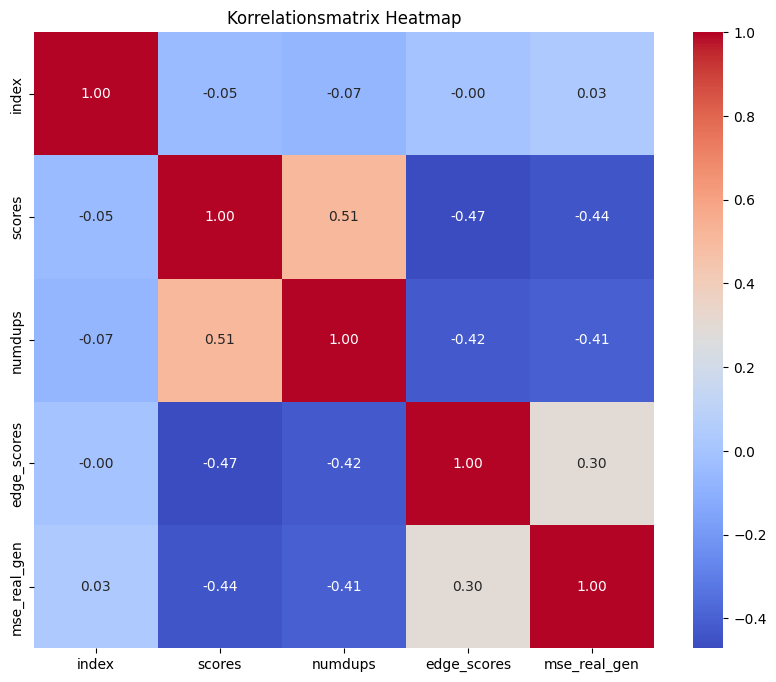

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur numerische Spalten auswählen
numeric_df = df_sorted.select_dtypes(include=['number'])

# Korrelation berechnen
corr = numeric_df.corr()

# Heatmap plotten
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix Heatmap')
plt.show()

In [8]:
!pip install seaborn matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 22.6 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.2 MB/s eta 0:00:00


In [3]:
import pandas as pd

df = pd.read_parquet('bb_attack_sdv1_multiple_full_analyzed.parquet')

df

,caption,index,scores,url,numdups,edge_scores,mse_real_gen,overfit_type,gen_seeds,retrieved_urls,template_indices
26136,"email, envelope, mail icon",1730933243,3641343.50,https://cdn3.iconfinder.com/data/icons/snowish...,12,-0.925842,NaN,N,[],[],[]
25877,"communication, email, mail, message, online, o...",2137580772,3646829.00,https://cdn2.iconfinder.com/data/icons/e-mail-...,8,-0.916794,NaN,N,[],[],[]
22716,The No Limits Business Woman Podcast,1030727993,3970528.00,https://onlinecoach1.hipcast.com/albumart/1000...,811,-0.916794,NaN,N,[],[],[]
27018,"lock, locked, padlock, protected, protection, ...",1155508791,3643078.50,https://cdn3.iconfinder.com/data/icons/police-...,6,-0.914291,NaN,N,[],[],[]
406,"""3M™ Privacy Filter for 24"""" Widescreen Monito...",1953226014,3632179.75,https://cdn.shopify.com/s/files/1/0250/9953/44...,6,-0.868073,NaN,N,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...
4444,"Aero 53984710WGRN 53 Series 15x8 Wheel, BL, 5 ...",1031246620,3653029.75,http://static.speedwaymotors.com/RS/SR/Product...,27,-0.325882,NaN,N,[],[],[]
22136,Susan Blue Area Rug by Charlton Home,1986924042,3631136.50,https://secure.img1-ag.wfcdn.com/im/63753371/r...,74,-0.325867,NaN,N,[],[],[]
3564,65-inch x 80-inch x 4 9/16-inch Brass 3/4-Lite...,1543139499,3637762.00,https://s7d2.scene7.com/is/image/homedepotcana...,8,-0.325577,NaN,N,[],[],[]
6509,Black and white shot of person walking on deso...,211851841,3658741.25,https://images.unsplash.com/8/nepal.jpg?ixlib=...,13,-0.325287,NaN,N,[],[],[]


In [ ]:



print(f"Saved combined image to {output_path}")


Saved combined image to output_combined_images/combined_9663.jpg
